In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import os
from tqdm import tqdm
import json
import time
import random
import pickle

In [2]:
import keras

In [3]:

from keras.models import Model, Sequential
from keras.layers import Dense, Input,Flatten,BatchNormalization,Conv2D,MaxPooling2D,BatchNormalization
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed

model=Sequential()
model.add(Input(shape=(None,128,96,1)))
model.add(TimeDistributed(Conv2D(filters=128,kernel_size=(5,5),padding="valid")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=128,kernel_size=(5,5),padding="valid")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=64,kernel_size=(3,3),padding="same")))
model.add(TimeDistributed(MaxPooling2D((3,3),strides=(2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Conv2D(filters=32,kernel_size=(3,3),padding="same")))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(512,activation="sigmoid",return_sequences=True))
model.add(LSTM(256,activation="sigmoid",return_sequences=True))
model.add(LSTM(128,activation="sigmoid"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(50,activation="softmax"))

In [4]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"]) 

In [5]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 124, 92, 128 3328      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 61, 45, 128) 0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 61, 45, 128) 512       
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 57, 41, 128) 409728    
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 28, 20, 128) 0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 28, 20, 128) 512       
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 28, 20, 64)  7

In [6]:
ed=np.zeros((50,50))


In [7]:
for i in range(ed.shape[0]):
    ed[i][i]=1

In [8]:
ed=pd.DataFrame(ed)

In [9]:
ed.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df=pd.read_csv("E:\capstone\code\WLASL-master\WLASL-master\start_kit\data.csv")
df.head()

,gloss,video_id,xmin,ymin,xmax,ymax,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id
0,book,69241,385,37,885,720,25.0,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0
1,book,65225,190,25,489,370,25.0,-1,1,1,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,0
2,book,68011,262,1,652,480,25.0,-1,1,2,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,0
3,book,68208,123,19,516,358,25.0,60,1,3,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0
4,book,68012,95,0,1180,720,25.0,-1,1,4,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,0


In [11]:
words=df.gloss.unique()

In [12]:
len(words)

2000

In [13]:
ed['gloss']=words[:50]

In [14]:
ed.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,gloss
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,book
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drink
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,computer
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,before
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chair


In [15]:
x_train=[[0] for i in range(120)]
y_train=[[0] for i in range(120)]
y_words_train=[[0] for i in range(120)]
x_test=[]
y_test=[]
y_words_test=[]
K=5
attempts=10


for word in tqdm(words[:50]): 

    for split in os.listdir(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}'.format(word)):
        if split==".DS_Store" or split=='._.DS_Store':
            continue
        try:
            for v in os.listdir(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}\{}'.format(word,split)):
                y_ind=ed[ed['gloss']==word].values[:,:-1]
            
                x_ind=np.load(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\preprocessed_vid_by_word_48_64 16.09.58\{}\{}\{}'.format(word,split,v))
                image_seg=[]
                start=x_ind.shape[0]*.2
                end=x_ind.shape[0]*.8
                frame_no=0
                for frame1 in x_ind:
                        frame_no=frame_no+1
                        if(frame_no<=start or frame_no>=end):
                            continue
                        frame=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
                        vectorized = frame.reshape((-1,3))
                        vectorized = np.float32(vectorized)
                        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
                        ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
                        center = np.uint8(center)
                        res = center[label.flatten()]
                        result_image = res.reshape((frame.shape))
                        result_image=cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
                        image_seg.append(result_image.reshape((128, 96,1)))
                image_seg=np.asarray(image_seg)
                #print(image_seg.shape)
                if(split=="train" or split=="val"):
                    
                    x_train[image_seg.shape[0]].append(image_seg)
                    y_train[image_seg.shape[0]].append(y_ind)
                    y_words_train[image_seg.shape[0]].append(word)
                elif(split=="test"):
                    x_test.append(image_seg)
                    y_test.append(y_ind)
                    y_words_test.append(word)
                
                
        except Exception as e:
            print("Error:" ,e ,"file",i)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [31:30<00:00, 37.82s/it]


In [16]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

120
120
132
132


In [23]:
words_del=[]
d=0
for i in tqdm(range(len(x_train))):
    if(len(x_train[i])<10):
        d=d+len(x_train[i])
        words_del.append(y_words_train[i])
        del x_train[i]
        del y_train[i]
        del y_words_train[i]
        i=i-1
d        

100%|██████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<?, ?it/s]


193

In [24]:
words_del

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0, 'go'],
 [0, 'black', 'cool', 'what', 'man', 'white'],
 [0, 'help', 'year', 'bed', 'bed', 'language'],
 [0, 'drink', 'go', 'fine', 'many', 'woman'],
 [0, 'before', 'candy', 'deaf', 'year', 'tall'],
 [0, 'computer', 'clothes', 'cool', 'hot', 'blue', 'dog', 'graduate', 'shirt'],
 [0, 'candy', 'deaf', 'mother', 'mother', 'mother', 'bowling', 'later'],
 [0,
  'chair',
  'deaf',
  'deaf',
  'fine',
  'cool',
  'graduate',
  'hearing',
  'hearing'],
 [0, 'year', 'man', 'shirt'],
 [0, 'before', 'cousin', 'like', 'table', 'later', 'later', 'study'],
 [0, 'book', 'cousin', 'orange', 'orange', 'dog'],
 [0, 'hot'],
 [0, 'orange', 'language'],
 [0, 'computer', 'chair', 'yes'],
 [0, 'drink', 'like'],
 [0, 'candy', 'language'],
 [0, 'year', 'graduate'],
 [0],
 [0],
 [0, 'woman'],
 [0, 'fine'],
 [0, 'all', 'hat'],
 [0, 'study'],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0, 'kiss'],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0, 'language'],
 [0, '

In [25]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

41
41
132
132


In [26]:
for i in range(len(x_train)):
    del x_train[i][0]
    del y_train[i][0]
    del y_words_train[i][0]

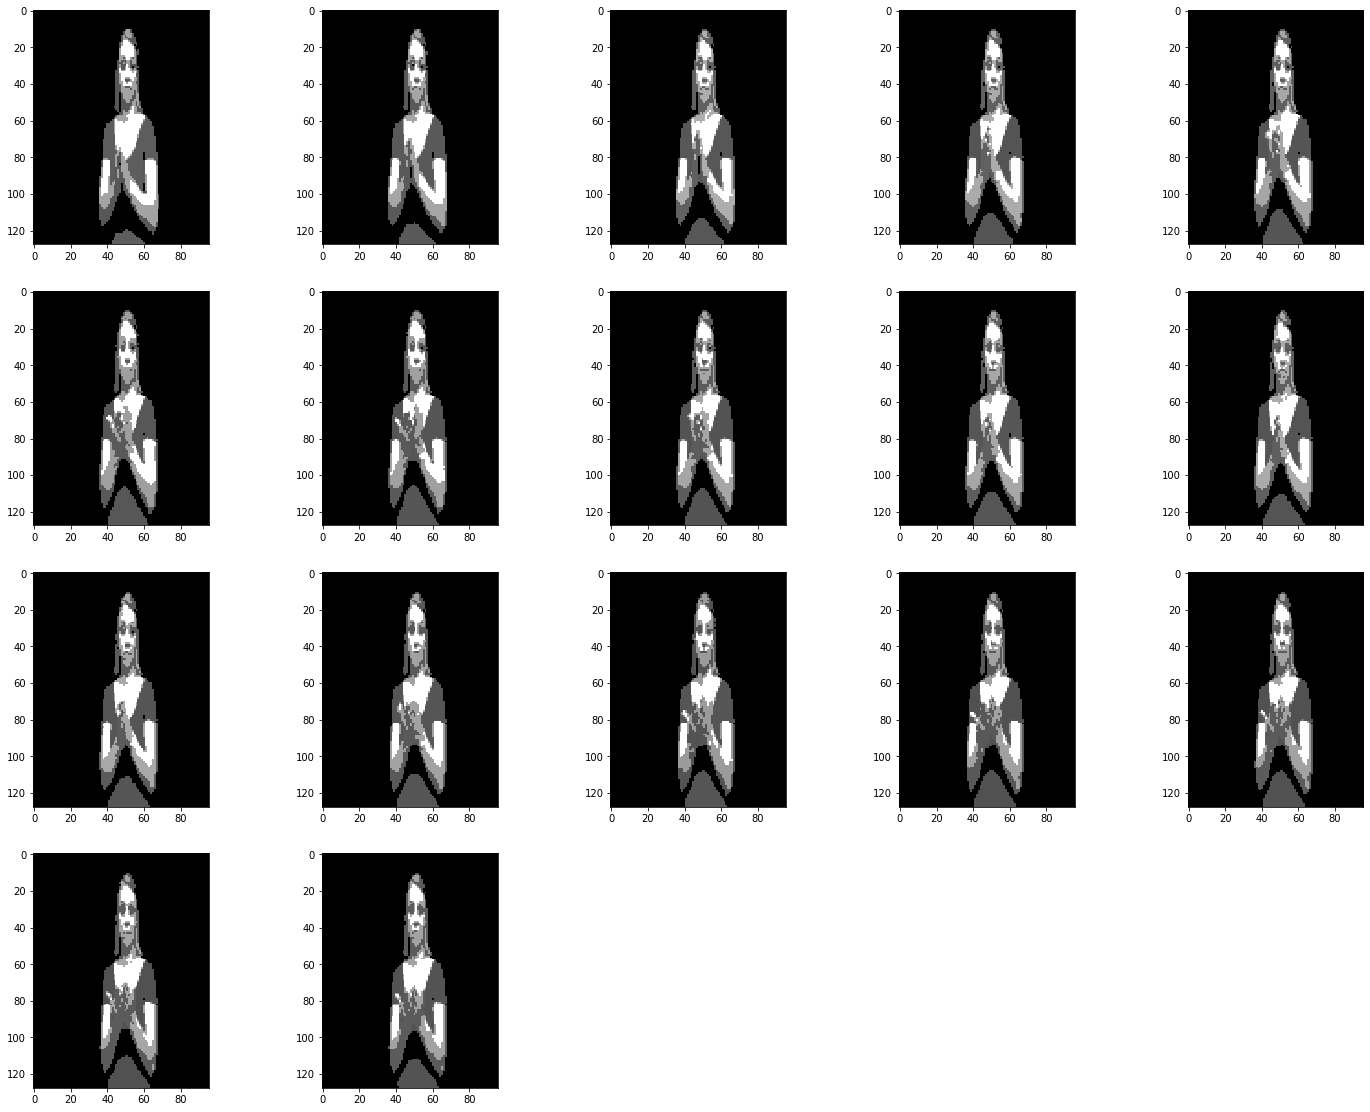

In [27]:
plt.figure(figsize=(25,25))
for i in range(min(25,x_train[0][0].shape[0])):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[0][0][i].reshape((128,96)),cmap="gray")


In [28]:
x_train[0][3].shape

(17, 128, 96, 1)

In [30]:
len(x_train),len(y_train),len(x_test),len(y_test)

(41, 41, 132, 132)

In [33]:
x_train=np.asarray(x_train)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_test=np.array(y_test)


In [34]:
for i in range(x_train.shape[0]):
    x_train[i]=np.asarray(x_train[i])
    y_train[i]=np.asarray(y_train[i])
    y_words_train[i]=np.asarray(y_words_train[i])

In [35]:
x_train=x_train/255
x_test=x_test/255


NameError: name 'x_val' is not defined

In [37]:

from sklearn.utils import shuffle
x_train, y_train,y_words_train = shuffle(x_train, y_train,y_words_train,random_state=0)


In [38]:
for i in range(y_train.shape[0]):
    
    y_train[i]=y_train[i].reshape((y_train[i].shape[0],50))

In [39]:
x_train[0].shape

(17, 45, 128, 96, 1)

  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

epoch 0
1/1 [==============================] - 0s 118ms/step - loss: 4.0894 - accuracy: 0.0000e+00


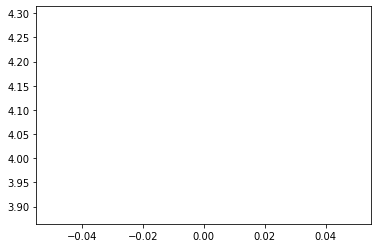

  2%|██                                                                                 | 1/41 [01:24<56:07, 84.18s/it]

1/1 [==============================] - 0s 223ms/step - loss: 4.4316 - accuracy: 0.0417


  5%|███▉                                                                            | 2/41 [06:06<1:33:20, 143.61s/it]

1/1 [==============================] - 0s 5ms/step - loss: 4.9295 - accuracy: 0.0000e+00


  7%|█████▊                                                                          | 3/41 [06:47<1:11:32, 112.97s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.7690 - accuracy: 0.0667


 10%|████████                                                                           | 4/41 [07:08<52:39, 85.38s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9488 - accuracy: 0.0000e+00


 12%|██████████                                                                         | 5/41 [07:27<39:07, 65.22s/it]

1/1 [==============================] - 0s 67ms/step - loss: 4.2637 - accuracy: 0.0000e+00


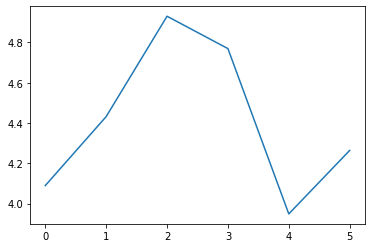

 15%|████████████▏                                                                      | 6/41 [08:18<35:37, 61.09s/it]

1/1 [==============================] - 0s 87ms/step - loss: 4.4683 - accuracy: 0.0435


 17%|██████████████▏                                                                    | 7/41 [10:32<47:02, 83.01s/it]

1/1 [==============================] - 0s 6ms/step - loss: 4.1859 - accuracy: 0.0000e+00


 20%|████████████████▏                                                                  | 8/41 [10:59<36:17, 66.00s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.3146 - accuracy: 0.0000e+00


 22%|██████████████████▏                                                                | 9/41 [11:39<31:08, 58.38s/it]

1/1 [==============================] - 0s 101ms/step - loss: 4.3270 - accuracy: 0.0500


 24%|████████████████████                                                              | 10/41 [14:05<43:47, 84.75s/it]

1/1 [==============================] - 0s 126ms/step - loss: 4.0802 - accuracy: 0.0385


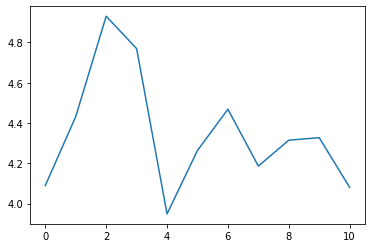

 27%|█████████████████████▏                                                         | 11/41 [18:00<1:04:52, 129.75s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9312 - accuracy: 0.0909


 29%|███████████████████████▋                                                         | 12/41 [18:33<48:39, 100.67s/it]

1/1 [==============================] - 0s 60ms/step - loss: 4.2692 - accuracy: 0.0000e+00


 32%|██████████████████████████                                                        | 13/41 [19:50<43:36, 93.44s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8985 - accuracy: 0.0000e+00


 34%|████████████████████████████                                                      | 14/41 [20:07<31:43, 70.50s/it]

1/1 [==============================] - 0s 49ms/step - loss: 3.9613 - accuracy: 0.0000e+00


 37%|██████████████████████████████                                                    | 15/41 [21:04<28:49, 66.51s/it]

1/1 [==============================] - 0s 53ms/step - loss: 3.9171 - accuracy: 0.0000e+00


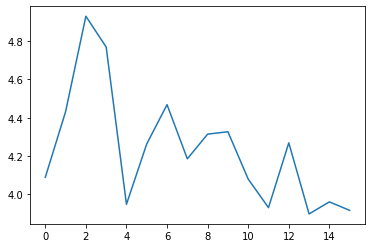

 39%|████████████████████████████████                                                  | 16/41 [22:08<27:26, 65.87s/it]

1/1 [==============================] - 0s 134ms/step - loss: 3.9118 - accuracy: 0.0333


 41%|██████████████████████████████████                                                | 17/41 [24:47<37:31, 93.80s/it]

1/1 [==============================] - 0s 95ms/step - loss: 4.0502 - accuracy: 0.0370


 44%|███████████████████████████████████▌                                             | 18/41 [27:53<46:31, 121.38s/it]

1/1 [==============================] - 0s 92ms/step - loss: 4.0838 - accuracy: 0.0000e+00


 46%|█████████████████████████████████████▌                                           | 19/41 [29:18<40:33, 110.62s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9695 - accuracy: 0.0000e+00


 49%|████████████████████████████████████████                                          | 20/41 [30:08<32:17, 92.28s/it]

1/1 [==============================] - 0s 2ms/step - loss: 4.0380 - accuracy: 0.0000e+00


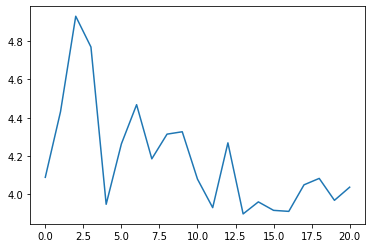

 51%|██████████████████████████████████████████                                        | 21/41 [30:48<25:31, 76.57s/it]

1/1 [==============================] - 0s 88ms/step - loss: 3.9551 - accuracy: 0.0000e+00


 54%|████████████████████████████████████████████                                      | 22/41 [32:19<25:37, 80.91s/it]

1/1 [==============================] - 0s 3ms/step - loss: 4.0137 - accuracy: 0.0000e+00


 56%|██████████████████████████████████████████████                                    | 23/41 [32:38<18:42, 62.35s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9803 - accuracy: 0.0625


 59%|████████████████████████████████████████████████                                  | 24/41 [33:19<15:54, 56.14s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9078 - accuracy: 0.0000e+00


 61%|██████████████████████████████████████████████████                                | 25/41 [34:05<14:05, 52.85s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8687 - accuracy: 0.0000e+00


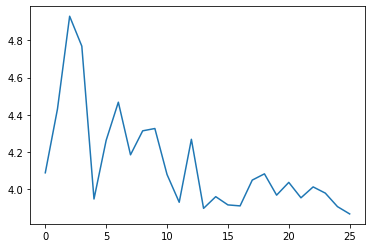

 63%|████████████████████████████████████████████████████                              | 26/41 [34:49<12:36, 50.43s/it]

1/1 [==============================] - 0s 1ms/step - loss: 4.0051 - accuracy: 0.0000e+00


 66%|██████████████████████████████████████████████████████                            | 27/41 [35:22<10:32, 45.17s/it]

1/1 [==============================] - 0s 90ms/step - loss: 3.9012 - accuracy: 0.0526


 68%|████████████████████████████████████████████████████████                          | 28/41 [37:50<16:25, 75.85s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9376 - accuracy: 0.0667


 71%|██████████████████████████████████████████████████████████                        | 29/41 [38:09<11:48, 59.02s/it]

1/1 [==============================] - 0s 1ms/step - loss: 3.8823 - accuracy: 0.0833


 73%|████████████████████████████████████████████████████████████                      | 30/41 [38:59<10:16, 56.09s/it]

1/1 [==============================] - 0s 8ms/step - loss: 3.9848 - accuracy: 0.0000e+00


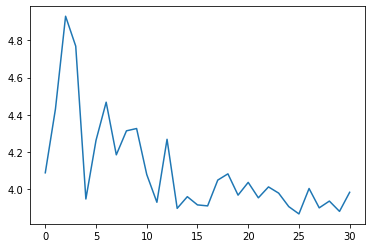

 76%|██████████████████████████████████████████████████████████████                    | 31/41 [39:35<08:21, 50.13s/it]

1/1 [==============================] - 0s 153ms/step - loss: 3.9050 - accuracy: 0.0000e+00


 78%|████████████████████████████████████████████████████████████████                  | 32/41 [42:28<13:03, 87.06s/it]

1/1 [==============================] - 0s 80ms/step - loss: 3.9211 - accuracy: 0.0000e+00


 80%|██████████████████████████████████████████████████████████████████                | 33/41 [43:46<11:13, 84.23s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9261 - accuracy: 0.0769


 83%|████████████████████████████████████████████████████████████████████              | 34/41 [44:08<07:39, 65.60s/it]

1/1 [==============================] - 0s 59ms/step - loss: 3.9053 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [45:10<06:27, 64.60s/it]

1/1 [==============================] - 0s 56ms/step - loss: 3.9039 - accuracy: 0.0526


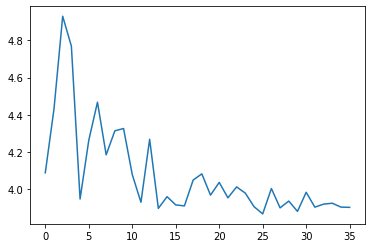

 88%|████████████████████████████████████████████████████████████████████████          | 36/41 [46:18<05:27, 65.52s/it]

2/2 [==============================] - 126s 63s/step - loss: 3.9193 - accuracy: 0.0351


 90%|█████████████████████████████████████████████████████████████████████████        | 37/41 [52:30<10:30, 157.55s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8844 - accuracy: 0.1429


 93%|███████████████████████████████████████████████████████████████████████████      | 38/41 [53:02<05:59, 119.77s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9575 - accuracy: 0.0000e+00


 95%|██████████████████████████████████████████████████████████████████████████████    | 39/41 [53:48<03:15, 97.61s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9351 - accuracy: 0.0000e+00


 98%|████████████████████████████████████████████████████████████████████████████████  | 40/41 [54:15<01:16, 76.48s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9280 - accuracy: 0.0000e+00


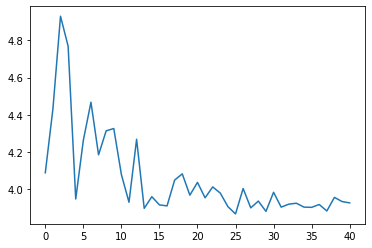

  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

epoch 1
1/1 [==============================] - 0s 77ms/step - loss: 3.9494 - accuracy: 0.0000e+00


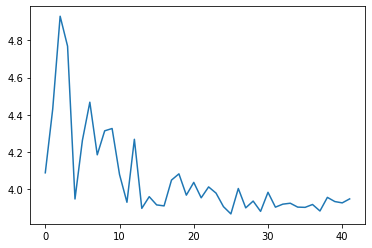

  2%|██                                                                                 | 1/41 [01:18<52:23, 78.59s/it]

1/1 [==============================] - 0s 117ms/step - loss: 3.9453 - accuracy: 0.0417


  5%|███▉                                                                            | 2/41 [05:35<1:25:53, 132.15s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9013 - accuracy: 0.0000e+00


  7%|█████▊                                                                          | 3/41 [06:18<1:06:44, 105.38s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9220 - accuracy: 0.0000e+00


 10%|████████                                                                           | 4/41 [06:46<50:39, 82.14s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8999 - accuracy: 0.0000e+00


 12%|██████████                                                                         | 5/41 [07:11<38:55, 64.88s/it]

1/1 [==============================] - 0s 22ms/step - loss: 3.9284 - accuracy: 0.0000e+00


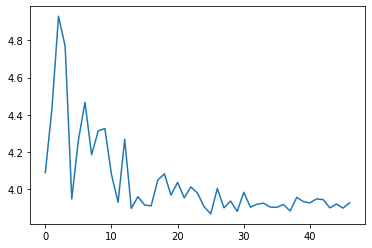

 15%|████████████▏                                                                      | 6/41 [08:13<37:20, 64.01s/it]

1/1 [==============================] - 0s 124ms/step - loss: 3.9173 - accuracy: 0.0000e+00


 17%|██████████████▏                                                                    | 7/41 [11:07<55:07, 97.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8744 - accuracy: 0.1538


 20%|████████████████▏                                                                  | 8/41 [11:37<42:21, 77.01s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9002 - accuracy: 0.0000e+00


 22%|██████████████████▏                                                                | 9/41 [12:31<37:21, 70.06s/it]

1/1 [==============================] - 0s 101ms/step - loss: 3.8953 - accuracy: 0.0000e+00


 24%|████████████████████                                                              | 10/41 [15:09<49:45, 96.32s/it]

1/1 [==============================] - 0s 85ms/step - loss: 3.9270 - accuracy: 0.0385


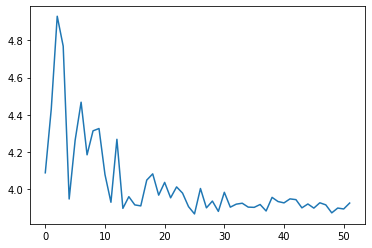

 27%|█████████████████████▏                                                         | 11/41 [19:05<1:09:10, 138.36s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8798 - accuracy: 0.0909


 29%|███████████████████████▋                                                         | 12/41 [19:43<52:14, 108.07s/it]

1/1 [==============================] - 0s 72ms/step - loss: 3.9121 - accuracy: 0.0833


 32%|█████████████████████████▋                                                       | 13/41 [21:07<47:06, 100.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8913 - accuracy: 0.0000e+00


 34%|████████████████████████████                                                      | 14/41 [21:27<34:33, 76.81s/it]

1/1 [==============================] - 0s 65ms/step - loss: 3.8855 - accuracy: 0.0000e+00


 37%|██████████████████████████████                                                    | 15/41 [22:42<33:01, 76.19s/it]

1/1 [==============================] - 0s 22ms/step - loss: 3.8972 - accuracy: 0.0000e+00


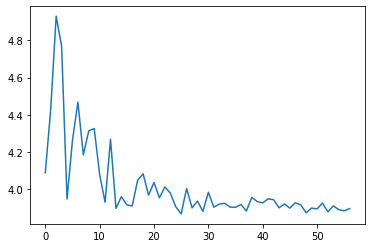

 39%|████████████████████████████████                                                  | 16/41 [23:53<31:02, 74.51s/it]

1/1 [==============================] - 0s 122ms/step - loss: 3.9087 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▌                                               | 17/41 [26:50<42:05, 105.22s/it]

1/1 [==============================] - 0s 128ms/step - loss: 3.9201 - accuracy: 0.1111


 44%|███████████████████████████████████▌                                             | 18/41 [30:16<51:55, 135.47s/it]

1/1 [==============================] - 0s 96ms/step - loss: 3.9103 - accuracy: 0.0417


 46%|█████████████████████████████████████▌                                           | 19/41 [32:11<47:30, 129.57s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8744 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                         | 20/41 [33:04<37:15, 106.44s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8862 - accuracy: 0.0500


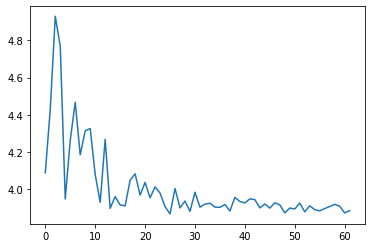

 51%|██████████████████████████████████████████                                        | 21/41 [33:54<29:49, 89.47s/it]

1/1 [==============================] - 0s 86ms/step - loss: 3.8969 - accuracy: 0.0370


 54%|████████████████████████████████████████████                                      | 22/41 [35:50<30:53, 97.57s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9158 - accuracy: 0.0000e+00


 56%|██████████████████████████████████████████████                                    | 23/41 [36:10<22:16, 74.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9290 - accuracy: 0.0000e+00


 59%|████████████████████████████████████████████████                                  | 24/41 [37:10<19:50, 70.03s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8962 - accuracy: 0.0556


 61%|██████████████████████████████████████████████████                                | 25/41 [38:10<17:52, 67.04s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8825 - accuracy: 0.1111


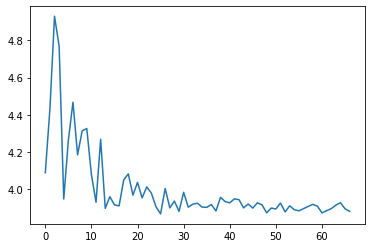

 63%|████████████████████████████████████████████████████                              | 26/41 [39:00<15:25, 61.72s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.9473 - accuracy: 0.0000e+00


 66%|██████████████████████████████████████████████████████                            | 27/41 [39:41<12:59, 55.71s/it]

1/1 [==============================] - 0s 106ms/step - loss: 3.8835 - accuracy: 0.1579


 68%|████████████████████████████████████████████████████████                          | 28/41 [42:37<19:53, 91.77s/it]

1/1 [==============================] - 0s 7ms/step - loss: 3.9087 - accuracy: 0.0667


 71%|██████████████████████████████████████████████████████████                        | 29/41 [43:09<14:44, 73.70s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8875 - accuracy: 0.0833


 73%|████████████████████████████████████████████████████████████                      | 30/41 [44:01<12:21, 67.37s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9402 - accuracy: 0.0000e+00


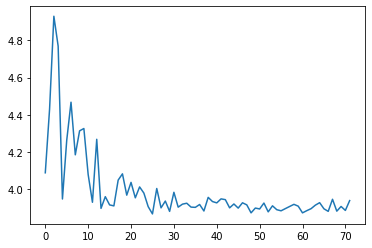

 76%|██████████████████████████████████████████████████████████████                    | 31/41 [44:46<10:04, 60.42s/it]

1/1 [==============================] - 0s 129ms/step - loss: 3.8886 - accuracy: 0.0000e+00


 78%|███████████████████████████████████████████████████████████████▏                 | 32/41 [48:28<16:22, 109.12s/it]

1/1 [==============================] - 0s 75ms/step - loss: 3.8990 - accuracy: 0.0000e+00


 80%|█████████████████████████████████████████████████████████████████▏               | 33/41 [50:48<15:47, 118.40s/it]

1/1 [==============================] - 0s 10ms/step - loss: 3.9130 - accuracy: 0.0769


 83%|████████████████████████████████████████████████████████████████████              | 34/41 [51:16<10:38, 91.25s/it]

1/1 [==============================] - 0s 71ms/step - loss: 3.8995 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [52:31<08:38, 86.45s/it]

1/1 [==============================] - 0s 253ms/step - loss: 3.8898 - accuracy: 0.0526


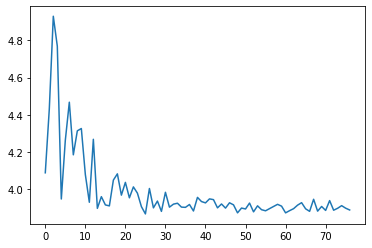

 88%|████████████████████████████████████████████████████████████████████████          | 36/41 [54:01<07:17, 87.50s/it]

2/2 [==============================] - 155s 77s/step - loss: 3.9152 - accuracy: 0.0351


 90%|███████████████████████████████████████████████████████████████████████▎       | 37/41 [1:01:10<12:38, 189.74s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8547 - accuracy: 0.1429


 93%|█████████████████████████████████████████████████████████████████████████▏     | 38/41 [1:01:47<07:11, 143.91s/it]

1/1 [==============================] - 0s 66ms/step - loss: 3.9319 - accuracy: 0.0000e+00


 95%|███████████████████████████████████████████████████████████████████████████▏   | 39/41 [1:02:54<04:01, 120.89s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9417 - accuracy: 0.0000e+00


 98%|██████████████████████████████████████████████████████████████████████████████  | 40/41 [1:03:31<01:35, 95.83s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9312 - accuracy: 0.0000e+00


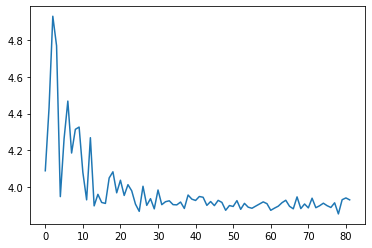

  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

epoch 2
1/1 [==============================] - 0s 71ms/step - loss: 3.9320 - accuracy: 0.0000e+00


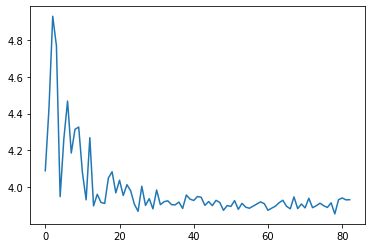

  2%|██                                                                                 | 1/41 [01:24<56:28, 84.70s/it]

1/1 [==============================] - 0s 140ms/step - loss: 3.9521 - accuracy: 0.0417


  5%|███▉                                                                            | 2/41 [06:13<1:34:47, 145.82s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9071 - accuracy: 0.0000e+00


  7%|█████▊                                                                          | 3/41 [07:07<1:15:01, 118.45s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9272 - accuracy: 0.0000e+00


 10%|████████                                                                           | 4/41 [07:37<56:33, 91.71s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8677 - accuracy: 0.0000e+00


 12%|██████████                                                                         | 5/41 [08:01<43:00, 71.68s/it]

1/1 [==============================] - 0s 22ms/step - loss: 3.9361 - accuracy: 0.0000e+00


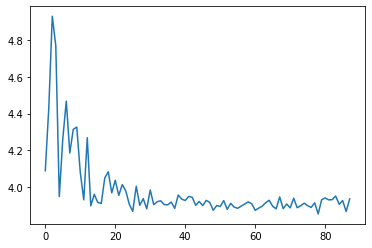

 15%|████████████▏                                                                      | 6/41 [09:12<41:31, 71.19s/it]

1/1 [==============================] - 0s 149ms/step - loss: 3.9247 - accuracy: 0.0000e+00


 17%|██████████████                                                                    | 7/41 [12:17<59:42, 105.38s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8402 - accuracy: 0.1538


 20%|████████████████▏                                                                  | 8/41 [12:54<46:46, 85.05s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8876 - accuracy: 0.0000e+00


 22%|██████████████████▏                                                                | 9/41 [13:49<40:30, 75.94s/it]

1/1 [==============================] - 0s 134ms/step - loss: 3.8835 - accuracy: 0.0000e+00


 24%|████████████████████                                                              | 10/41 [16:16<50:13, 97.22s/it]

1/1 [==============================] - 0s 140ms/step - loss: 3.9385 - accuracy: 0.0385


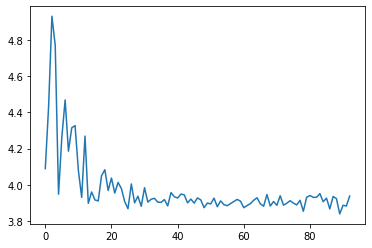

 27%|█████████████████████▏                                                         | 11/41 [20:50<1:15:10, 150.34s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8591 - accuracy: 0.0909


 29%|███████████████████████▋                                                         | 12/41 [21:33<57:06, 118.17s/it]

1/1 [==============================] - 0s 66ms/step - loss: 3.9205 - accuracy: 0.0833


 32%|█████████████████████████▋                                                       | 13/41 [23:02<51:01, 109.34s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8949 - accuracy: 0.0000e+00


 34%|████████████████████████████                                                      | 14/41 [23:23<37:13, 82.72s/it]

1/1 [==============================] - 0s 130ms/step - loss: 3.8806 - accuracy: 0.0000e+00


 37%|██████████████████████████████                                                    | 15/41 [24:41<35:15, 81.37s/it]

1/1 [==============================] - 0s 33ms/step - loss: 3.8831 - accuracy: 0.0000e+00


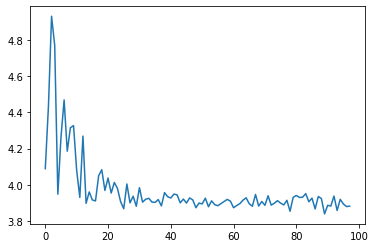

 39%|████████████████████████████████                                                  | 16/41 [25:50<32:23, 77.73s/it]

1/1 [==============================] - 0s 134ms/step - loss: 3.9144 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▌                                               | 17/41 [28:55<43:54, 109.77s/it]

1/1 [==============================] - 0s 136ms/step - loss: 3.9280 - accuracy: 0.1111


 44%|███████████████████████████████████▌                                             | 18/41 [32:23<53:25, 139.39s/it]

1/1 [==============================] - 0s 113ms/step - loss: 3.9093 - accuracy: 0.0417


 46%|█████████████████████████████████████▌                                           | 19/41 [34:18<48:26, 132.11s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8548 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                         | 20/41 [35:11<37:53, 108.26s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8638 - accuracy: 0.0500


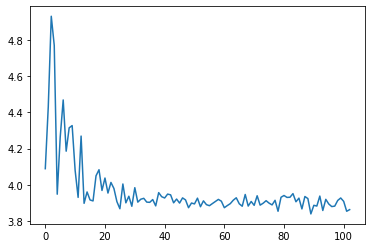

 51%|██████████████████████████████████████████                                        | 21/41 [36:02<30:22, 91.12s/it]

1/1 [==============================] - 0s 97ms/step - loss: 3.8874 - accuracy: 0.0370


 54%|████████████████████████████████████████████                                      | 22/41 [38:01<31:29, 99.45s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9202 - accuracy: 0.0000e+00


 56%|██████████████████████████████████████████████                                    | 23/41 [38:23<22:55, 76.39s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9432 - accuracy: 0.0000e+00


 59%|████████████████████████████████████████████████                                  | 24/41 [39:20<19:55, 70.32s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8888 - accuracy: 0.0556


 61%|██████████████████████████████████████████████████                                | 25/41 [40:17<17:43, 66.44s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8750 - accuracy: 0.1111


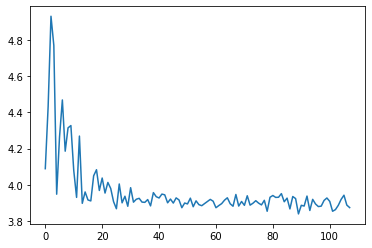

 63%|████████████████████████████████████████████████████                              | 26/41 [41:03<15:05, 60.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9656 - accuracy: 0.0000e+00


 66%|██████████████████████████████████████████████████████                            | 27/41 [41:45<12:47, 54.82s/it]

1/1 [==============================] - 0s 101ms/step - loss: 3.8664 - accuracy: 0.1579


 68%|████████████████████████████████████████████████████████                          | 28/41 [44:46<20:03, 92.57s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9019 - accuracy: 0.0667


 71%|██████████████████████████████████████████████████████████                        | 29/41 [45:12<14:34, 72.85s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8809 - accuracy: 0.0833


 73%|████████████████████████████████████████████████████████████                      | 30/41 [46:05<12:12, 66.62s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9538 - accuracy: 0.0000e+00


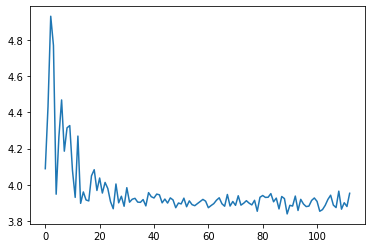

 76%|██████████████████████████████████████████████████████████████                    | 31/41 [46:51<10:06, 60.62s/it]

1/1 [==============================] - 0s 96ms/step - loss: 3.8780 - accuracy: 0.0000e+00


 78%|███████████████████████████████████████████████████████████████▏                 | 32/41 [51:13<18:09, 121.03s/it]

1/1 [==============================] - 0s 91ms/step - loss: 3.8907 - accuracy: 0.0000e+00


 80%|█████████████████████████████████████████████████████████████████▏               | 33/41 [53:05<15:47, 118.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9186 - accuracy: 0.0769


 83%|████████████████████████████████████████████████████████████████████              | 34/41 [53:34<10:40, 91.50s/it]

1/1 [==============================] - 0s 70ms/step - loss: 3.9001 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [54:45<08:31, 85.28s/it]

1/1 [==============================] - 0s 110ms/step - loss: 3.8782 - accuracy: 0.0526


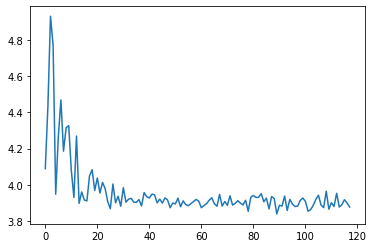

 88%|████████████████████████████████████████████████████████████████████████          | 36/41 [56:27<07:31, 90.22s/it]

2/2 [==============================] - 142s 71s/step - loss: 3.9184 - accuracy: 0.0351


 90%|███████████████████████████████████████████████████████████████████████▎       | 37/41 [1:03:24<12:33, 188.48s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.8254 - accuracy: 0.1429


 93%|█████████████████████████████████████████████████████████████████████████▏     | 38/41 [1:04:02<07:09, 143.08s/it]

1/1 [==============================] - 0s 8ms/step - loss: 3.9197 - accuracy: 0.0000e+00


 95%|███████████████████████████████████████████████████████████████████████████▏   | 39/41 [1:05:05<03:58, 119.09s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9559 - accuracy: 0.0000e+00


 98%|██████████████████████████████████████████████████████████████████████████████  | 40/41 [1:05:41<01:34, 94.32s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9321 - accuracy: 0.0000e+00


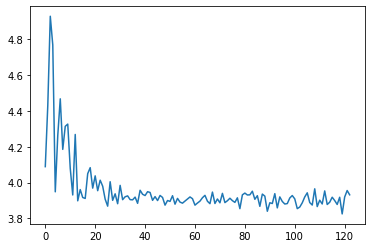

  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

epoch 3
1/1 [==============================] - 0s 85ms/step - loss: 3.9240 - accuracy: 0.0000e+00


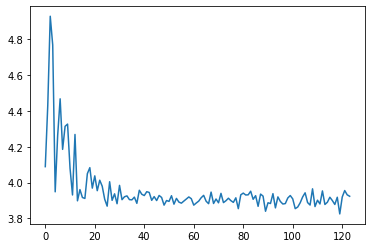

  2%|██                                                                                 | 1/41 [01:24<56:08, 84.22s/it]

1/1 [==============================] - 0s 140ms/step - loss: 3.9641 - accuracy: 0.0417


  5%|███▉                                                                            | 2/41 [06:21<1:36:21, 148.24s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9135 - accuracy: 0.0000e+00


  7%|█████▊                                                                          | 3/41 [07:16<1:16:02, 120.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9333 - accuracy: 0.0000e+00


 10%|████████                                                                           | 4/41 [07:45<57:13, 92.79s/it]

1/1 [==============================] - 0s 9ms/step - loss: 3.8425 - accuracy: 0.0000e+00


 12%|██████████                                                                         | 5/41 [08:10<43:28, 72.46s/it]

1/1 [==============================] - 0s 26ms/step - loss: 3.9415 - accuracy: 0.0000e+00


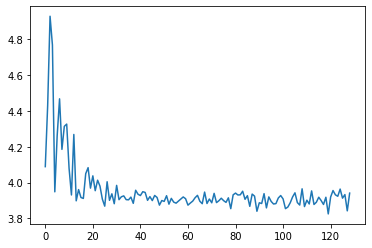

 15%|████████████▏                                                                      | 6/41 [09:23<42:25, 72.73s/it]

1/1 [==============================] - 0s 117ms/step - loss: 3.9309 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 7/41 [12:32<1:00:52, 107.42s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8156 - accuracy: 0.1538


 20%|████████████████▏                                                                  | 8/41 [13:09<47:29, 86.33s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8805 - accuracy: 0.0000e+00


 22%|██████████████████▏                                                                | 9/41 [14:07<41:31, 77.87s/it]

1/1 [==============================] - 0s 98ms/step - loss: 3.8773 - accuracy: 0.0000e+00


 24%|███████████████████▊                                                             | 10/41 [16:54<54:02, 104.60s/it]

1/1 [==============================] - 0s 114ms/step - loss: 3.9468 - accuracy: 0.0385


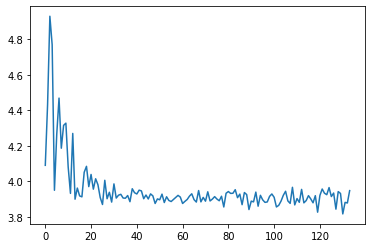

 27%|█████████████████████▏                                                         | 11/41 [21:35<1:18:44, 157.49s/it]

1/1 [==============================] - 0s 40ms/step - loss: 3.8484 - accuracy: 0.0909


 29%|███████████████████████▋                                                         | 12/41 [22:16<59:18, 122.70s/it]

1/1 [==============================] - 0s 68ms/step - loss: 3.9300 - accuracy: 0.0833


 32%|█████████████████████████▋                                                       | 13/41 [23:48<52:53, 113.35s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9036 - accuracy: 0.0000e+00


 34%|████████████████████████████                                                      | 14/41 [24:08<38:25, 85.38s/it]

1/1 [==============================] - 0s 246ms/step - loss: 3.8811 - accuracy: 0.0000e+00


 37%|██████████████████████████████                                                    | 15/41 [25:29<36:23, 83.99s/it]

1/1 [==============================] - 0s 55ms/step - loss: 3.8738 - accuracy: 0.0000e+00


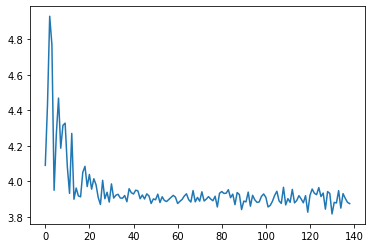

 39%|████████████████████████████████                                                  | 16/41 [26:42<33:36, 80.68s/it]

1/1 [==============================] - 0s 119ms/step - loss: 3.9198 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▌                                               | 17/41 [29:42<44:13, 110.54s/it]

1/1 [==============================] - 0s 103ms/step - loss: 3.9336 - accuracy: 0.1111


 44%|███████████████████████████████████▌                                             | 18/41 [33:14<54:02, 140.96s/it]

1/1 [==============================] - 0s 94ms/step - loss: 3.9081 - accuracy: 0.0417


 46%|█████████████████████████████████████▌                                           | 19/41 [35:18<49:53, 136.06s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8513 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                         | 20/41 [36:11<38:52, 111.07s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8528 - accuracy: 0.0500


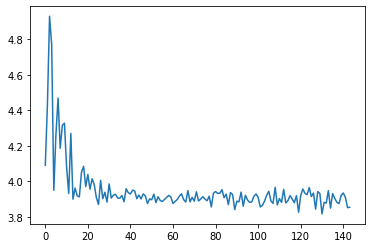

 51%|██████████████████████████████████████████                                        | 21/41 [37:01<30:54, 92.71s/it]

1/1 [==============================] - 0s 104ms/step - loss: 3.8804 - accuracy: 0.0370


 54%|███████████████████████████████████████████▍                                     | 22/41 [39:00<31:51, 100.60s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9157 - accuracy: 0.0000e+00


 56%|██████████████████████████████████████████████                                    | 23/41 [39:22<23:07, 77.09s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9463 - accuracy: 0.0000e+00


 59%|████████████████████████████████████████████████                                  | 24/41 [40:19<20:09, 71.13s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8912 - accuracy: 0.0556


 61%|██████████████████████████████████████████████████                                | 25/41 [41:15<17:43, 66.45s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8834 - accuracy: 0.1111


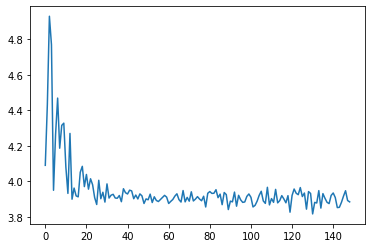

 63%|████████████████████████████████████████████████████                              | 26/41 [42:02<15:11, 60.77s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.9655 - accuracy: 0.0000e+00


 66%|██████████████████████████████████████████████████████                            | 27/41 [42:50<13:15, 56.84s/it]

1/1 [==============================] - 0s 170ms/step - loss: 3.8630 - accuracy: 0.1579


 68%|████████████████████████████████████████████████████████                          | 28/41 [45:31<19:02, 87.90s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8964 - accuracy: 0.0667


 71%|██████████████████████████████████████████████████████████                        | 29/41 [45:59<14:02, 70.20s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8884 - accuracy: 0.0833


 73%|████████████████████████████████████████████████████████████                      | 30/41 [46:52<11:52, 64.79s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9518 - accuracy: 0.0000e+00


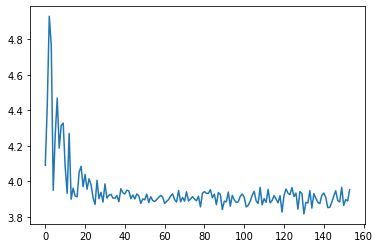

 76%|██████████████████████████████████████████████████████████████                    | 31/41 [47:37<09:48, 58.84s/it]

1/1 [==============================] - 0s 108ms/step - loss: 3.8707 - accuracy: 0.0000e+00


 78%|███████████████████████████████████████████████████████████████▏                 | 32/41 [51:37<17:00, 113.35s/it]

1/1 [==============================] - 0s 97ms/step - loss: 3.8792 - accuracy: 0.0000e+00


 80%|█████████████████████████████████████████████████████████████████▏               | 33/41 [53:51<15:56, 119.51s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9198 - accuracy: 0.0769


 83%|████████████████████████████████████████████████████████████████████              | 34/41 [54:22<10:49, 92.82s/it]

1/1 [==============================] - 0s 76ms/step - loss: 3.8995 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [55:39<08:49, 88.18s/it]

1/1 [==============================] - 0s 80ms/step - loss: 3.8753 - accuracy: 0.0526


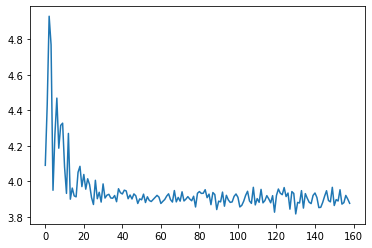

 88%|████████████████████████████████████████████████████████████████████████          | 36/41 [57:20<07:39, 91.97s/it]

2/2 [==============================] - 176s 88s/step - loss: 3.9163 - accuracy: 0.0351


 90%|███████████████████████████████████████████████████████████████████████▎       | 37/41 [1:04:39<13:05, 196.30s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8208 - accuracy: 0.1429


 93%|█████████████████████████████████████████████████████████████████████████▏     | 38/41 [1:05:18<07:27, 149.05s/it]

1/1 [==============================] - 0s 49ms/step - loss: 3.9018 - accuracy: 0.0000e+00


 95%|███████████████████████████████████████████████████████████████████████████▏   | 39/41 [1:06:30<04:11, 125.87s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9568 - accuracy: 0.0000e+00


 98%|█████████████████████████████████████████████████████████████████████████████  | 40/41 [1:07:11<01:40, 100.29s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9331 - accuracy: 0.0000e+00


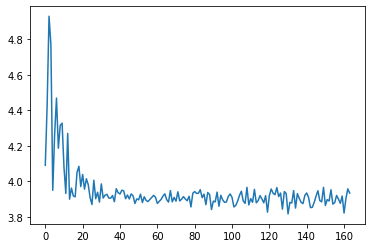

  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

epoch 4
1/1 [==============================] - 0s 101ms/step - loss: 3.9130 - accuracy: 0.0000e+00


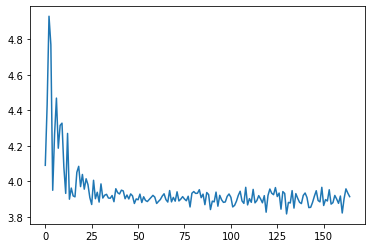

  2%|█▉                                                                               | 1/41 [01:30<1:00:25, 90.63s/it]

1/1 [==============================] - 0s 150ms/step - loss: 3.9641 - accuracy: 0.0417


  5%|███▉                                                                            | 2/41 [06:35<1:40:41, 154.91s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9172 - accuracy: 0.0000e+00


  7%|█████▊                                                                          | 3/41 [07:30<1:19:07, 124.94s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9322 - accuracy: 0.0000e+00


 10%|███████▉                                                                         | 4/41 [08:04<1:00:14, 97.68s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8204 - accuracy: 0.0000e+00


 12%|██████████                                                                         | 5/41 [08:29<45:33, 75.93s/it]

1/1 [==============================] - 0s 23ms/step - loss: 3.9417 - accuracy: 0.0000e+00


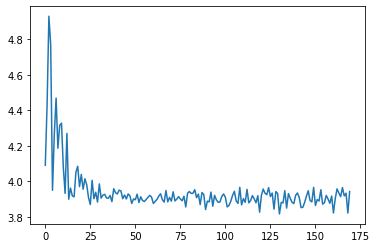

 15%|████████████▏                                                                      | 6/41 [09:44<44:02, 75.50s/it]

1/1 [==============================] - 0s 147ms/step - loss: 3.9340 - accuracy: 0.0000e+00


 17%|█████████████▋                                                                  | 7/41 [12:59<1:03:05, 111.33s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8011 - accuracy: 0.1538


 20%|████████████████▏                                                                  | 8/41 [13:37<49:10, 89.41s/it]

1/1 [==============================] - 0s 11ms/step - loss: 3.8765 - accuracy: 0.0000e+00


 22%|██████████████████▏                                                                | 9/41 [14:37<43:00, 80.64s/it]

1/1 [==============================] - 0s 115ms/step - loss: 3.8738 - accuracy: 0.0000e+00


 24%|███████████████████▊                                                             | 10/41 [17:20<54:22, 105.23s/it]

1/1 [==============================] - 0s 133ms/step - loss: 3.9531 - accuracy: 0.0385


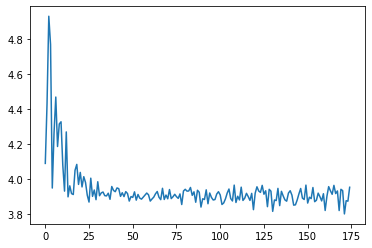

 27%|█████████████████████▏                                                         | 11/41 [21:49<1:17:16, 154.54s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8389 - accuracy: 0.0909


 29%|███████████████████████▋                                                         | 12/41 [22:34<58:45, 121.58s/it]

1/1 [==============================] - 0s 85ms/step - loss: 3.9374 - accuracy: 0.0833


 32%|█████████████████████████▋                                                       | 13/41 [24:21<54:45, 117.33s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9092 - accuracy: 0.0000e+00


 34%|████████████████████████████                                                      | 14/41 [24:43<39:53, 88.66s/it]

1/1 [==============================] - 0s 68ms/step - loss: 3.8802 - accuracy: 0.0000e+00


 37%|██████████████████████████████                                                    | 15/41 [26:13<38:33, 88.97s/it]

1/1 [==============================] - 0s 150ms/step - loss: 3.8676 - accuracy: 0.0000e+00


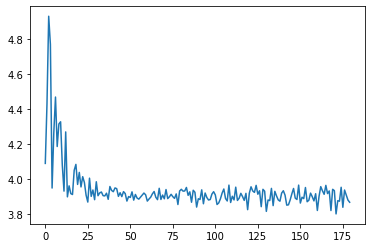

 39%|████████████████████████████████                                                  | 16/41 [27:29<35:29, 85.17s/it]

1/1 [==============================] - 0s 106ms/step - loss: 3.9230 - accuracy: 0.0000e+00


 41%|█████████████████████████████████▌                                               | 17/41 [30:51<48:05, 120.23s/it]

1/1 [==============================] - 0s 95ms/step - loss: 3.9386 - accuracy: 0.1111


 44%|███████████████████████████████████▌                                             | 18/41 [34:27<57:04, 148.90s/it]

1/1 [==============================] - 0s 104ms/step - loss: 3.9087 - accuracy: 0.0417


 46%|█████████████████████████████████████▌                                           | 19/41 [36:26<51:19, 139.98s/it]

1/1 [==============================] - 0s 4ms/step - loss: 3.8443 - accuracy: 0.0000e+00


 49%|███████████████████████████████████████▌                                         | 20/41 [37:25<40:28, 115.64s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8453 - accuracy: 0.0500


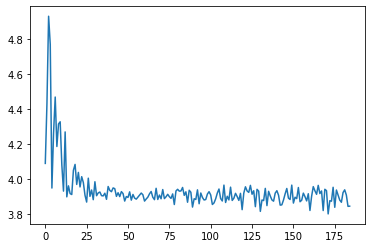

 51%|██████████████████████████████████████████                                        | 21/41 [38:17<32:10, 96.55s/it]

1/1 [==============================] - 0s 134ms/step - loss: 3.8756 - accuracy: 0.0370


 54%|███████████████████████████████████████████▍                                     | 22/41 [40:17<32:45, 103.43s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.9175 - accuracy: 0.0000e+00


 56%|██████████████████████████████████████████████                                    | 23/41 [40:40<23:47, 79.33s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9521 - accuracy: 0.0000e+00


 59%|████████████████████████████████████████████████                                  | 24/41 [41:40<20:54, 73.78s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8885 - accuracy: 0.0556


 61%|██████████████████████████████████████████████████                                | 25/41 [42:38<18:23, 68.98s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.8804 - accuracy: 0.1111


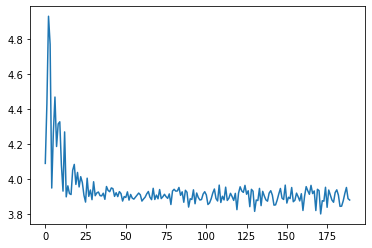

 63%|████████████████████████████████████████████████████                              | 26/41 [43:28<15:50, 63.35s/it]

1/1 [==============================] - 0s 2ms/step - loss: 3.9718 - accuracy: 0.0000e+00


 66%|██████████████████████████████████████████████████████                            | 27/41 [44:12<13:25, 57.54s/it]

1/1 [==============================] - 0s 137ms/step - loss: 3.8575 - accuracy: 0.1579


 68%|████████████████████████████████████████████████████████                          | 28/41 [47:03<19:48, 91.40s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8937 - accuracy: 0.0667


 71%|██████████████████████████████████████████████████████████                        | 29/41 [47:30<14:27, 72.27s/it]

1/1 [==============================] - 0s 3ms/step - loss: 3.8892 - accuracy: 0.0833


 73%|████████████████████████████████████████████████████████████                      | 30/41 [48:26<12:18, 67.16s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.9547 - accuracy: 0.0000e+00


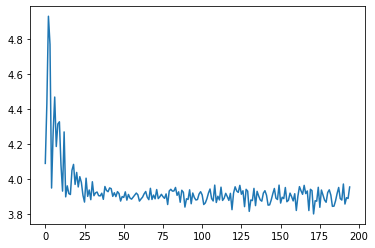

 76%|██████████████████████████████████████████████████████████████                    | 31/41 [49:12<10:10, 61.04s/it]

1/1 [==============================] - 0s 124ms/step - loss: 3.8659 - accuracy: 0.0000e+00


 78%|███████████████████████████████████████████████████████████████▏                 | 32/41 [53:14<17:15, 115.10s/it]

1/1 [==============================] - 0s 81ms/step - loss: 3.8749 - accuracy: 0.0000e+00


 80%|█████████████████████████████████████████████████████████████████▏               | 33/41 [55:32<16:16, 122.08s/it]

1/1 [==============================] - 0s 6ms/step - loss: 3.9240 - accuracy: 0.0769


 83%|████████████████████████████████████████████████████████████████████              | 34/41 [56:03<11:03, 94.74s/it]

1/1 [==============================] - 0s 24ms/step - loss: 3.8991 - accuracy: 0.0000e+00


 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [57:21<08:57, 89.62s/it]

1/1 [==============================] - 0s 76ms/step - loss: 3.8698 - accuracy: 0.0526


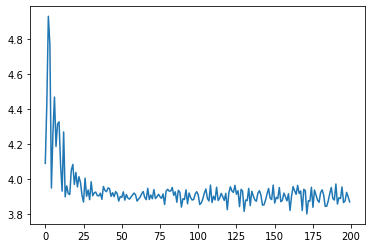

 88%|████████████████████████████████████████████████████████████████████████          | 36/41 [58:59<07:41, 92.25s/it]

2/2 [==============================] - 167s 84s/step - loss: 3.9180 - accuracy: 0.0351


 90%|███████████████████████████████████████████████████████████████████████▎       | 37/41 [1:06:05<12:48, 192.22s/it]

1/1 [==============================] - 0s 5ms/step - loss: 3.8113 - accuracy: 0.1429


 93%|█████████████████████████████████████████████████████████████████████████▏     | 38/41 [1:06:44<07:19, 146.38s/it]

1/1 [==============================] - 0s 62ms/step - loss: 3.8968 - accuracy: 0.0000e+00


 95%|███████████████████████████████████████████████████████████████████████████▏   | 39/41 [1:07:53<04:06, 123.16s/it]

1/1 [==============================] - 0s 7ms/step - loss: 3.9612 - accuracy: 0.0000e+00


 98%|██████████████████████████████████████████████████████████████████████████████  | 40/41 [1:08:33<01:38, 98.30s/it]

1/1 [==============================] - 0s 41ms/step - loss: 3.9322 - accuracy: 0.0000e+00


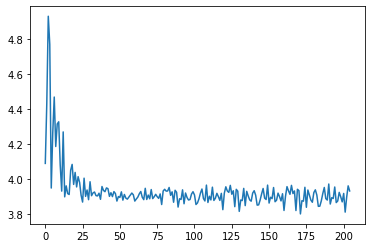

100%|███████████████████████████████████████████████████████████████████████████████| 41/41 [1:08:57<00:00, 100.91s/it]


In [40]:
error=[]
accuracy=[]
for epoch in range(5):
    print("epoch",epoch)
    for i in tqdm(range(0,x_train.shape[0])):
        met=model.fit(np.asarray(x_train[i]).astype(np.float32),np.asarray(y_train[i]).astype(np.float32),epochs=1)
        error.append(met.history['loss'])
        if(i%5==0):
            plt.plot(error)
            plt.show()
        

In [21]:
#model.save("capstone-Model-cnn-V2-onehotencoding.h5")

In [22]:
np.array(ed.iloc[0][:-1])

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [23]:
x_train_ind=np.expand_dims(x_train[0],axis=0)
pred=model.predict(x_train_ind)

40


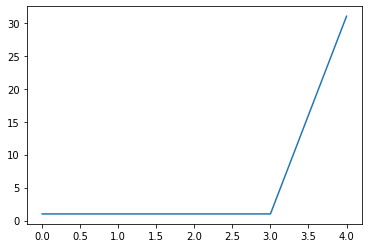

In [24]:
x_train_pred=[]
for i in tqdm(range(x_train.shape[0])):
    x_train_ind=np.expand_dims(x_train[i],axis=0)
    pred=model.predict(x_train_ind)
    pred=words[np.argmax(pred)]
    x_train_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 675/675 [39:45<00:00,  3.53s/it]


In [44]:
x_test_pred

array(['drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'drink', 'drink', 'drink', 'drink', 'drink', 'drink',
       'drink', 'dri

In [41]:
x_test_pred=[]

for i in tqdm(range(x_test.shape[0])):
    x_test_ind=np.expand_dims(x_test[i],axis=0)
    pred=model.predict(x_test_ind)
    pred=words[np.argmax(pred)]
    x_test_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [02:41<00:00,  1.23s/it]


In [27]:
x_val_pred=[]

for i in tqdm(range(x_val.shape[0])):
    x_val_ind=np.expand_dims(x_val[i],axis=0)
    pred=model.predict(x_val_ind)
    pred=words[np.argmax(pred)]
    x_val_pred.append(pred)
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 158/158 [09:44<00:00,  3.70s/it]


In [42]:
#x_val_pred=np.asarray(x_val_pred)
x_test_pred=np.asarray(x_test_pred)
#x_train_pred=np.asarray(x_train_pred)

In [47]:
np.unique(x_test_pred)

array(['drink'], dtype='<U5')

In [45]:
y_words_test=np.asarray(y_words_test)
 

In [46]:
(x_test_pred==y_words_test).sum()/x_test_pred.shape[0]*100

3.0303030303030303

In [ ]:
(x_val_pred==y_words_val).sum()/x_val_pred.shape[0]*100